In [1]:
from QAOAproblems import QAOAmaxcut
import networkx as nx

### Teste Calculate Minimal Paths,  Next Qubits e Swap Paths

Gerando o grafo do exemplo do artigo

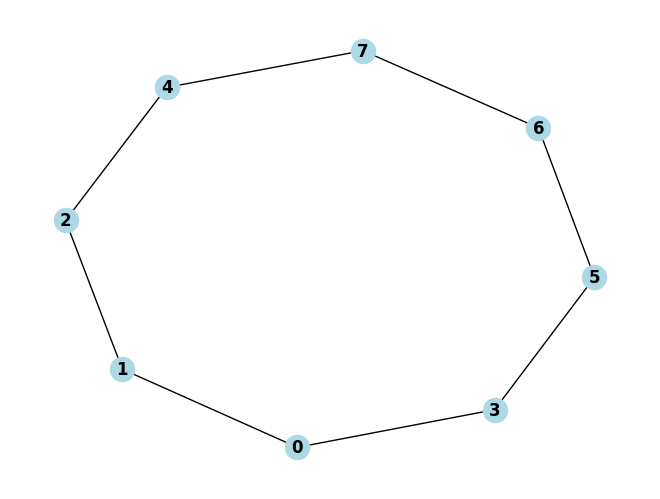

In [2]:
qubitmap_t = [0,1,2,3,4,5,6,7]
QM = nx.Graph()
QM.add_edges_from([(0,1),(1,2), (0,3), (2,4), (3,5), (5,6), (6,7), (4,7)])
nx.draw(QM, with_labels=True, node_color='lightblue', font_weight='bold')

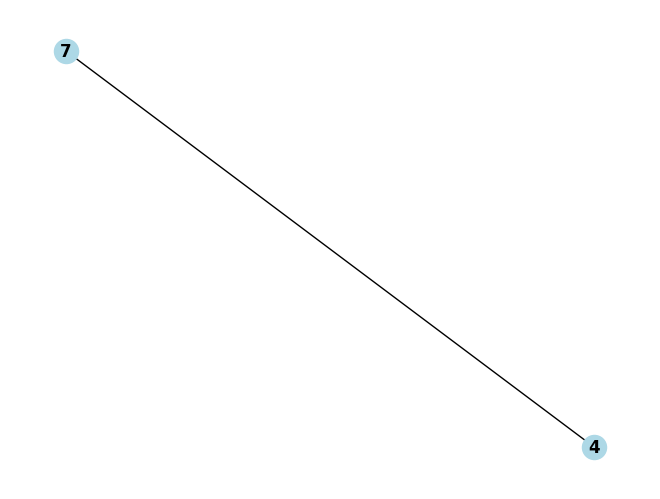

In [3]:
maxcut_graph = nx.Graph()
maxcut_graph.add_edges_from([(4,7)])
nx.draw(maxcut_graph, with_labels=True, node_color='lightblue', font_weight='bold')

Testando o exemplo do artigo

In [4]:
max_cut = QAOAmaxcut(graph=maxcut_graph, hardware_graph=QM)
path1, path2 = max_cut._calculate_minimal_paths(4, 7, 2, 1)
print(path1)
print(path2)

[4, 2]
[7, 4, 2, 1]


Ele gera os caminhos conforme o artigo, temos que checar agora se faz o swap

In [5]:
path1s, path2s = max_cut._calculate_minimal_paths(2, 4, 2, 1)
print(path1s)
print(path2s)

[2]
[4, 2, 1]


In [6]:
max_cut._swap_paths(path1s, path2s, 2)

([2, 1], [4, 2])

Troca os caminhos corretamente. Vamos testar next_qubits, ele deve retornar qual dos qubits atuais vai ser o q e o próximo elemento q1

In [7]:
max_cut = QAOAmaxcut(graph=maxcut_graph, hardware_graph=QM)
print(max_cut._next_qubits(path1, path2, 4,7))
print(max_cut._next_qubits(path2, path1, 7,4))

(4, 2)
(4, 2)


### Teste Decoding

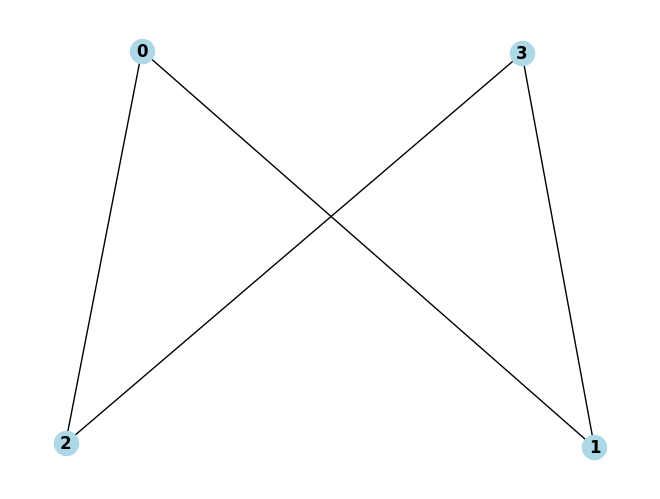

In [8]:
QM = nx.Graph()
QM.add_edges_from([(0,1),(0,2), (1,3), (2,3)])
nx.draw(QM, with_labels=True, node_color='lightblue', font_weight='bold')

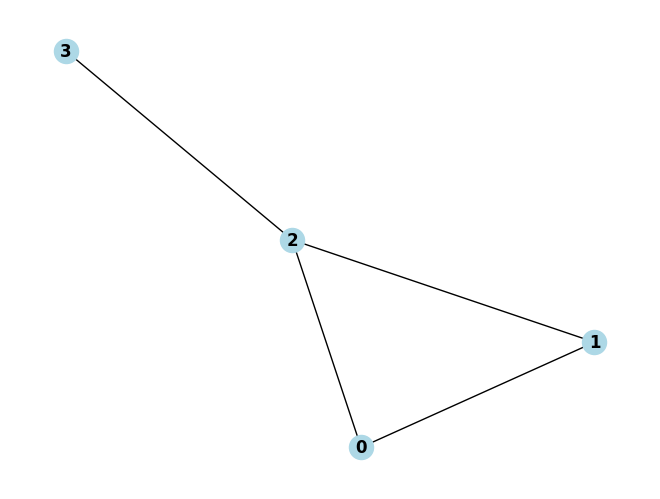

In [9]:
maxcut_graph = nx.Graph()
maxcut_graph.add_edges_from([(0,1),(0,2), (1,2), (2,3)])
nx.draw(maxcut_graph, with_labels=True, node_color='lightblue', font_weight='bold')

In [10]:
max_cut = QAOAmaxcut(graph=maxcut_graph, hardware_graph=QM)
ch1 = [(3,2), (0,2), (0,1), (1,2)]
ch2 = [(2,3), (0,2), (0,1), (2,3)]
qubitmap, node_times = max_cut.decoding(ch1=ch1, ch2=ch2)

P-S 3 2
times [0. 0. 3. 3.]
next ps [(0, 2), (0, 1), (1, 2)]
next mix [0, 1, 2, 3]
mix  3
[0. 0. 3. 4.]
remain  [0, 1, 2]
P-S 0 2
times [6. 0. 6. 4.]
next ps [(0, 1), (1, 2)]
next mix [0, 1, 2]
P-S 0 1
times [9. 9. 6. 4.]
next ps [(1, 2)]
next mix [0, 1, 2]
mix  0
[10.  9.  6.  4.]
remain  [1, 2]
SWAP 1 3
times [10. 11.  6. 11.]
P-S 1 2
times [10. 14. 14. 11.]
next ps []
next mix [1, 2]
mix  1
[10. 15. 14. 11.]
remain  [2]
mix  2
[10. 15. 15. 11.]
remain  []


In [11]:
node_times

array([10., 15., 15., 11.])

Podemos comparar com o resultado do artigo, em que temos os tempos de 11, 16, 16 e 12

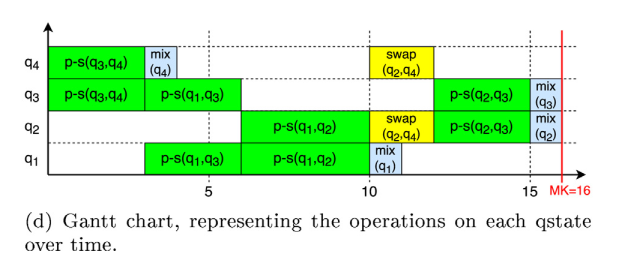

Considerando o artigos, os tempos são 10, 16, 16, 12. Como todos os p-s pesam 3, fica 15